In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mrna_df =pd.read_csv('../data/capstone2.mrn_df2_laptop.csv')
df = pd.read_csv('../data/METABRIC_RNA_Mutation.csv')

/Users/cpsanto/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
mrna_df

,Unnamed: 0,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,death_from_cancer
0,0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,0.0
1,1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,0.0
2,2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,1.0
3,3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,0.0
4,4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1899,0.1563,0.5543,-0.6149,0.4572,1.3822,-0.0537,-0.1323,0.2837,-0.0726,...,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540,0.0
1900,1900,0.1343,0.9128,1.3017,0.7383,0.1841,0.0028,0.1243,2.2040,-0.6190,...,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863,1.0
1901,1901,1.8107,-0.2608,0.4006,-0.2985,0.0356,-0.1620,1.5486,1.5309,-1.3653,...,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264,1.0
1902,1902,-1.2746,-1.7695,-0.3454,-0.3850,0.6689,1.4531,1.0956,-0.0948,-0.6188,...,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041,0.0


In [5]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)

In [6]:
filt1 = df.death_from_cancer ==1
full_death_df =df[filt1]
filt2 = df.death_from_cancer ==0
full_non_death_df=df[filt2]

In [7]:
full_death_df.shape
full_non_death_df.shape

(1281, 693)

In [8]:
filt = mrna_df.death_from_cancer==1

In [9]:
death_rna_df =mrna_df[filt]

In [10]:
death_rna_df.shape

(622, 491)

<AxesSubplot:>

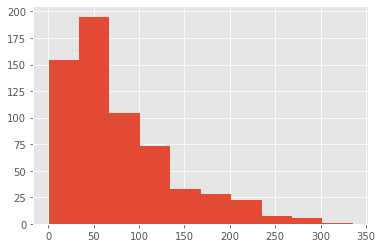

In [11]:
full_death_df.overall_survival_months.hist()

<AxesSubplot:>

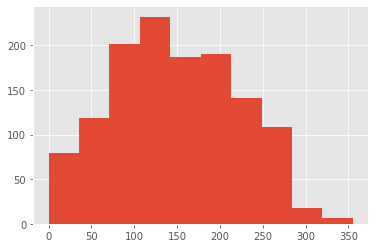

In [12]:
full_non_death_df.overall_survival_months.hist()

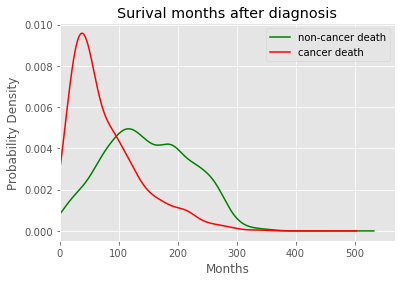

In [28]:
# ax = full_non_death_df["overall_survival_months"].hist(bins=15, density=True, stacked=True, color='k', alpha=0.6)
# ax=full_death_df["overall_survival_months"].hist(bins=15, density=True, stacked=True, color='b', alpha=0.6)
ax = full_non_death_df["overall_survival_months"].plot(kind='density', color='g', label = 'non-cancer death')
full_death_df["overall_survival_months"].plot(kind='density', color='red', label = 'cancer death')
ax.set(xlabel='Months')
ax.set_title('Surival months after diagnosis')
ax.plot(figsize = (12,12))
ax.set_ylabel('Probability Density')
plt.xlim(0)
plt.legend()
plt.savefig("probability_density_cancer_death_non_cancer_death.png")
plt.show()

In [14]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
death_rna_df['overall_survival_months'] = df.overall_survival_months

/Users/cpsanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
y =death_rna_df.pop('overall_survival_months')
X = death_rna_df

In [20]:
y

2       163.700000
4        41.366667
5         7.800000
9        36.266667
10      132.033333
           ...    
1895      6.833333
1896     78.466667
1898     82.733333
1900     44.733333
1901    175.966667
Name: overall_survival_months, Length: 622, dtype: float64

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=1)
X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [ ]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
                         ,'max_depth': [2, 4, 8]
                         ,'subsample': [0.25, 0.5, 0.75, 1.0]
                         ,'min_samples_leaf': [1, 2, 4]
                         ,'max_features': ['sqrt', 'log2', None]
                         ,'n_estimators': [5,10,25,50,100,200]}

random_forest_grid = {'max_depth': [2, 4, 8]
                     ,'max_features': ['sqrt', 'log2', None]
                     ,'min_samples_leaf': [1, 2, 4]
                     ,'min_samples_split': [2, 4]
                     ,'bootstrap': [True, False]
                     ,'n_estimators': [5,10,25,50,100,200]}

logistic_regression_grid = {'Cs':[2, 5]
                       ,'cv':[2,4,8]
                       ,'solver':['lbfgs', 'liblinear']
                       ,'max_iter' : [50]

                       }
svm_grid = {'C':[0.5, 1, 2]

                       ,'kernel':['rbf', 'liblinear']}

In [ ]:

logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
                                              ,svm_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
                                          ,gradient_boosting_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')

random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
                                                ,random_forest_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

In [ ]:
logistic_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

svm_randomsearch.fit(X_train, y_train)
print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

gradient_randomsearch.fit(X_train, y_train)
print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

random_foreset_randomsearch.fit(X_train, y_train)
print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")

In [ ]:
df.info(verbose = True)

In [26]:
 rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                              loss='ls',
                              n_estimators=100,
                              random_state=1)

dtr = DecisionTreeRegressor(random_state=1)

gdbr_bad = GradientBoostingRegressor(learning_rate=1,
                              loss='ls',
                              n_estimators=100,
                              random_state=1)

for model in [rf, gdbr, dtr, gdbr_bad]:
    for score in ['neg_mean_squared_error', 'r2']:
        score_val = np.mean(cross_val_score(model, X_train, y_train, scoring=score, cv=5))
        if score == 'neg_mean_squared_error':
            score_val *= -1
        print(f'For {model}, the {score} score is {score_val:.2f}')


random_forest_grid = {'max_depth': [3, None],
                  'max_features': ['sqrt', 'log2', None],
                  'min_samples_split': [2, 4],
                  'min_samples_leaf': [1, 2, 4],
                  'bootstrap': [True, False],
                  'n_estimators': [10, 20, 40, 80],
                  'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

print(mean_squared_error(y_test, best_rf_model.predict(X_test)))

default_model = RandomForestRegressor()
default_model.fit(X_train, y_train)
print(mean_squared_error(y_test, default_model.predict(X_test))) 

For RandomForestRegressor(n_jobs=-1, random_state=1), the neg_mean_squared_error score is 3060.60
For RandomForestRegressor(n_jobs=-1, random_state=1), the r2 score is 0.13
For GradientBoostingRegressor(random_state=1), the neg_mean_squared_error score is 3105.72
For GradientBoostingRegressor(random_state=1), the r2 score is 0.12
For DecisionTreeRegressor(random_state=1), the neg_mean_squared_error score is 5138.30
For DecisionTreeRegressor(random_state=1), the r2 score is -0.47
For GradientBoostingRegressor(learning_rate=1, random_state=1), the neg_mean_squared_error score is 6081.03
For GradientBoostingRegressor(learning_rate=1, random_state=1), the r2 score is -0.72
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.7min finished


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 1}
3033.992597660425
655.8848724601604
